In [1]:
!gdown --id 1eJwPwq_ky79TcPE7K8Zh34LeH3IIrDfi

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1eJwPwq_ky79TcPE7K8Zh34LeH3IIrDfi
To: /content/C. Diabetic Retinopathy Grading.zip
100% 601M/601M [00:09<00:00, 62.1MB/s]


In [ ]:
!unzip C._Diabetic_Retinopathy_Grading.zip

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [4]:
# read an image
img = cv2.imread('/content/C. Diabetic Retinopathy Grading/1. Original Images/a. Training Set/001.png')
# show image format (basically a 3-d array of pixel color info, in BGR format)
print(img)

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]]

 [[ 0  0  0]
  [ 1  1  1]
  [ 2  2  2]
  ...
  [ 3  3  3]
  [ 2  2  2]
  [ 2  2  2]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [13 13 13]
  [11 11 11]
  [11 11 11]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [15 15 15]
  [12 12 12]
  [ 9  9  9]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [16 16 16]
  [12 12 12]
  [ 9  9  9]]]


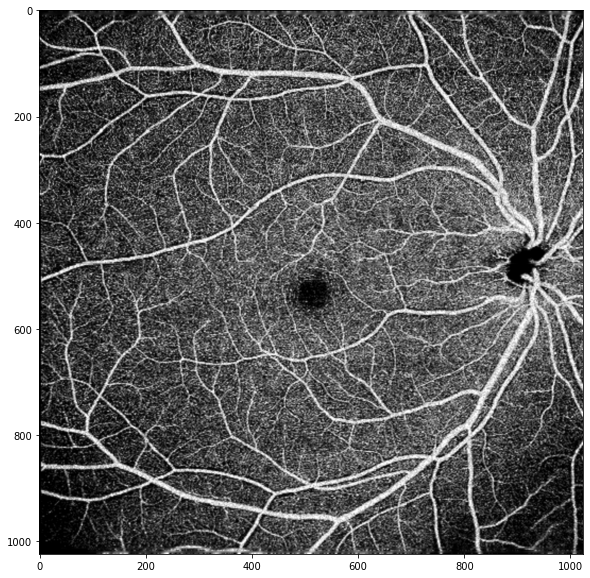

In [5]:
# convert image to RGB color for matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# show image with matplotlib
plt.figure(figsize=(10,10))
plt.imshow(img)

In [6]:
# convert image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# grayscale image represented as a 2-d array
print(gray_img)

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  1  1  1]
 [ 0  1  2 ...  3  2  2]
 ...
 [ 0  0  0 ... 13 11 11]
 [ 0  0  0 ... 15 12  9]
 [ 0  0  0 ... 16 12  9]]


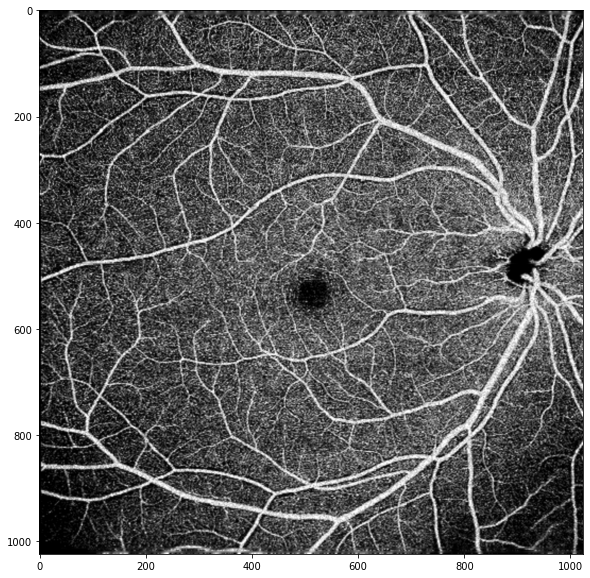

In [7]:
# have to convert grayscale back to RGB for plt.imshow()
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(gray_img, cv2.COLOR_GRAY2RGB))

In [8]:
# threshold for grayscale image
_, threshold_img = cv2.threshold(gray_img, 60, 255, cv2.THRESH_BINARY)

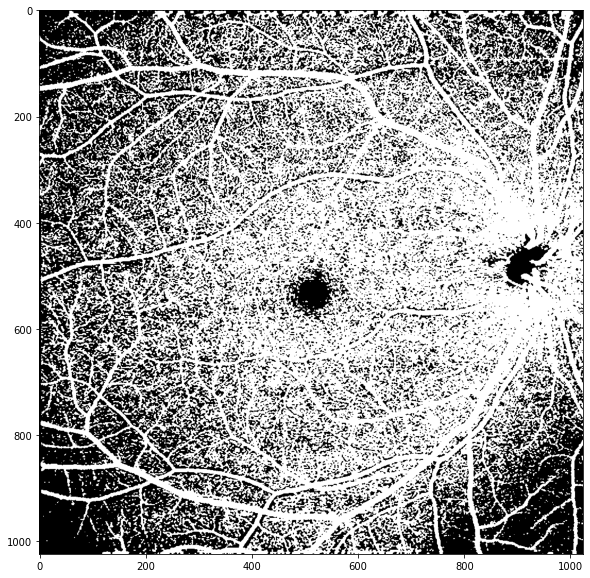

In [9]:
threshold_img = cv2.cvtColor(threshold_img, cv2.COLOR_GRAY2RGB)
plt.figure(figsize=(10,10))
plt.imshow(threshold_img)

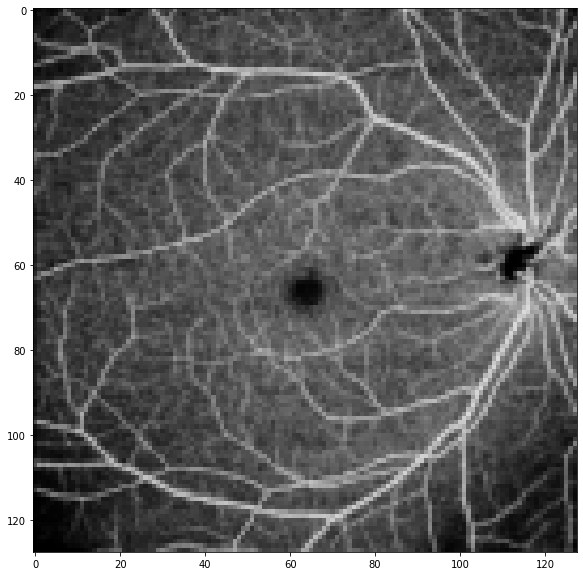

In [10]:
from skimage import data, color, img_as_float
from skimage.transform import rescale, resize

img = img_as_float(img)
image_resized = resize(img, (img.shape[0] // 8, img.shape[1] // 8))
plt.figure(figsize=(10,10))
plt.imshow(image_resized)

In [11]:
import torch
import torch.nn

img_tensor = torch.from_numpy(image_resized.transpose(2,0,1)).unsqueeze(0)

# TODO: Use interpolation function torch.nn.functional to upsample images with different modes.
img_nearest = torch.nn.functional.interpolate(img_tensor, img.shape[:-1], mode='nearest')
img_bilinear = torch.nn.functional.interpolate(img_tensor, img.shape[:-1], mode='bilinear')
img_bicubic = torch.nn.functional.interpolate(img_tensor, img.shape[:-1], mode='bicubic')

# TODO: Convert images back to numpy. 
img_nearest = img_nearest.squeeze(0).numpy().transpose(1, 2, 0)
img_bilinear = img_bilinear.squeeze(0).numpy().transpose(1, 2, 0)
img_bicubic = img_bicubic.squeeze(0).numpy().transpose(1, 2, 0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


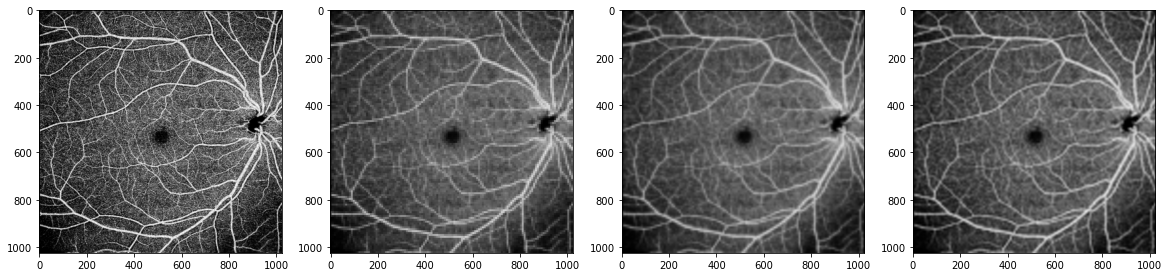

In [12]:
# Visualization of images
f, axarr = plt.subplots(1,4,figsize=(20,20))

axarr[0].imshow(img)
axarr[1].imshow(img_nearest)
axarr[2].imshow(img_bilinear)
axarr[3].imshow(img_bicubic)

In [13]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

# TODO: calculate the psnr and ssim scores between original image and upsampled
# version. Do these scores align with the visualizations?
# What is psnr?
# https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio#:~:text=Peak%20signal%2Dto%2Dnoise%20ratio%20(PSNR)%20is%20an,the%20fidelity%20of%20its%20representation.
# Whar is ssim?
# https://en.wikipedia.org/wiki/Structural_similarity

print(ssim(img_nearest, img, multichannel=True), psnr(img_nearest, img))
print(ssim(img_bilinear, img, multichannel=True), psnr(img_bilinear, img))
print(ssim(img_bicubic, img, multichannel=True), psnr(img_bicubic, img))

0.26045502276497445 15.693718836256163
0.25167465606306666 15.645050847194193
0.2698424245777654 21.94787747677642


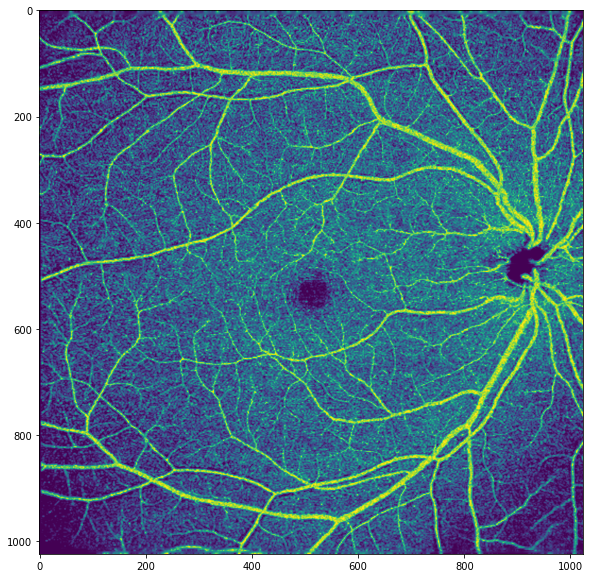

In [14]:
# read an image
img = cv2.imread('/content/C. Diabetic Retinopathy Grading/1. Original Images/a. Training Set/001.png')
# show image with matplotlib
# Why would cv2.COLOR_RGB2GRAY and cv2.COLOR_BGR2GRAY give different results?
# https://stackoverflow.com/questions/62855718/why-would-cv2-color-rgb2gray-and-cv2-color-bgr2gray-give-different-results
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(img)